In [25]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
#leer el conjunto de datos
data = pd.read_csv('data.csv') #https://pandas.pydata.org/docs/reference/io.html
pd.options.display.max_columns = 14
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


In [14]:
data.info() # metadata (number of colums, column types ...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [15]:
data.isnull().values.sum() # check for total null values

0

In [16]:
data.isnull().sum() # column wise distribution of nulls

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [5]:
data.describe() # statistical of the data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


In [12]:
# variables categoricas
# key => map integers to pitches
# 0 => C
# 1 => C#/Db
# 2 => D
# 3 => D#/Eb
# 4 => E
# 5 => F
# 6 => F#/Gb
# 7 => G
# 8 => G#/Ab
# 9 => A
# 10 => A#/Bb
# 11 => B
key = data['key'].value_counts()
key

1     30
8     22
6     20
7     19
9     18
5     18
10    17
2     15
0     12
11    10
4      9
3      5
Name: key, dtype: int64

array([[<AxesSubplot:title={'center':'key'}>]], dtype=object)

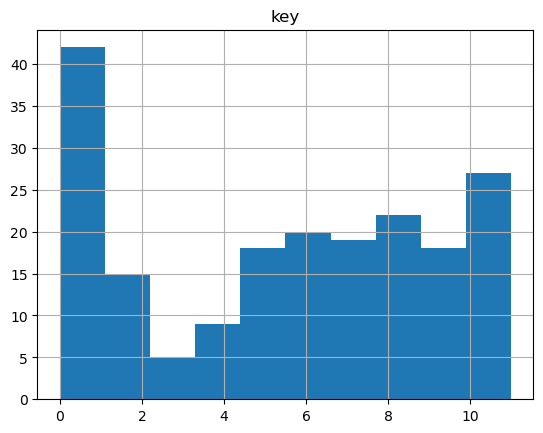

In [13]:
data.hist(column='key')

In [17]:
# variables categoricas
# mode => modality
# 1 => major
# 0 => minor
mode = data['mode'].value_counts()
mode

1    105
0     90
Name: mode, dtype: int64

array([[<AxesSubplot:title={'center':'mode'}>]], dtype=object)

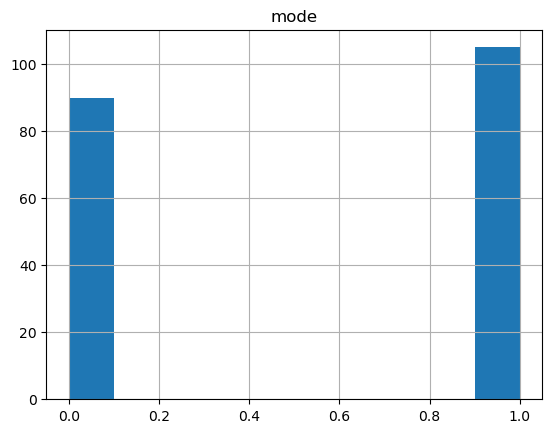

In [18]:
data.hist(column='mode')

In [20]:
# variables categoricas
# liked => variable dependiente o respuesta
# 1 => like
# 0 => dislike
liked = data['liked'].value_counts()
liked

1    100
0     95
Name: liked, dtype: int64

array([[<AxesSubplot:title={'center':'liked'}>]], dtype=object)

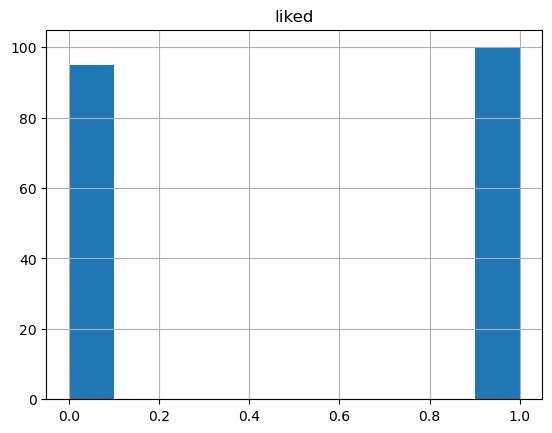

In [21]:
data.hist(column='liked')

In [6]:
corr = data.corr()
corr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
danceability,1.000000,0.137188,-0.063906,0.455078,0.043759,0.388596,-0.234176,-0.807053,-0.137069,0.612344,0.223522,-0.232621,0.317096,0.569425
energy,0.137188,1.000000,0.130251,0.813567,-0.068308,0.122825,-0.772583,-0.241444,0.166508,0.319409,0.214905,-0.134527,0.123942,0.176179
key,-0.063906,0.130251,1.000000,0.046865,-0.103371,-0.093395,-0.066844,0.003597,-0.039622,0.033336,0.097240,0.054522,0.048344,-0.044406
loudness,0.455078,0.813567,0.046865,1.000000,-0.041678,0.279710,-0.664989,-0.538266,0.078093,0.363532,0.274462,-0.206334,0.207806,0.410774
mode,0.043759,-0.068308,-0.103371,-0.041678,1.000000,0.031953,-0.025709,0.075442,-0.048661,0.033409,-0.036270,-0.060965,-0.110739,0.023747
speechiness,0.388596,0.122825,-0.093395,0.279710,0.031953,1.000000,-0.079710,-0.343242,-0.006665,0.180708,0.313918,-0.388397,0.140325,0.591505
acousticness,-0.234176,-0.772583,-0.066844,-0.664989,-0.025709,-0.079710,1.000000,0.294320,-0.140988,-0.313806,-0.255097,0.138793,-0.142177,-0.179375
instrumentalness,-0.807053,-0.241444,0.003597,-0.538266,0.075442,-0.343242,0.294320,1.000000,0.055730,-0.572224,-0.299493,0.249683,-0.375199,-0.569440
liveness,-0.137069,0.166508,-0.039622,0.078093,-0.048661,-0.006665,-0.140988,0.055730,1.000000,-0.013004,-0.010555,-0.143966,-0.135409,-0.009797
valence,0.612344,0.319409,0.033336,0.363532,0.033409,0.180708,-0.313806,-0.572224,-0.013004,1.000000,0.218017,-0.114842,0.201111,0.268653


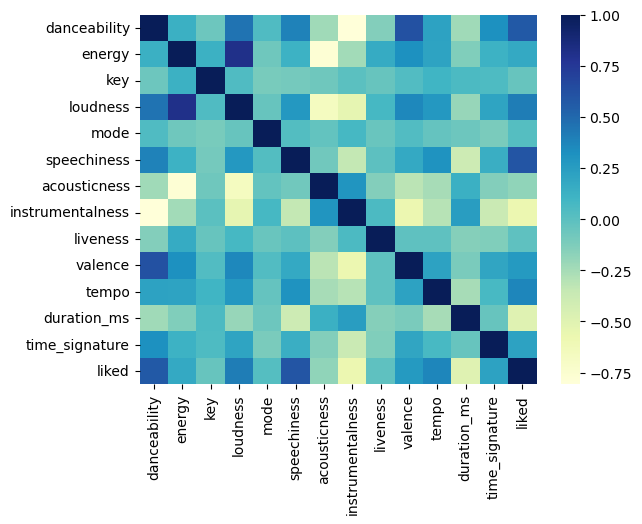

In [7]:
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=False)
import matplotlib.pyplot as mp

# displaying heatmap
mp.show()


altas correlaciones > 0.8
energy <=> loudness => 0.813567 => bastante correlaccionadas
energy => intensity and activity. Typically, energetic tracks feel fast, loud, and noisy
loudness => The overall loudness of a track in decibels (dB)
energy and loudness estan muy correlacionadas, a mayor energy mayor loudness, podriamos quitar una para nuestro analisis
danceability <=> valence => 0.612344
danceability => how suitable a track is for dancing 
valence => musical positiveness conveyed by a track
estan bastante correlaccionadas, vemos que si la cancion es positiva, crea happyness => es muy probable que sea una cancion bailable
vemos correlaciones con la variable dependiente pero esas no las analizamos por que son los gustos del autor



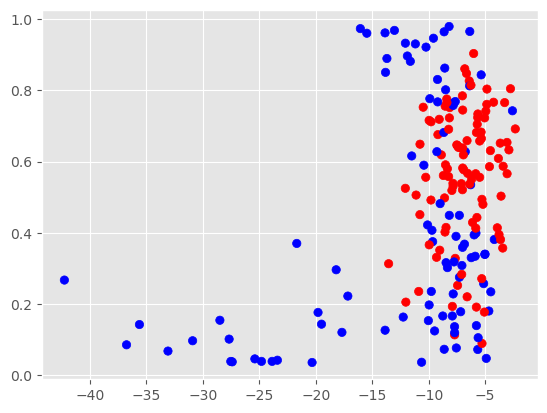

In [40]:
plt.scatter(data.loudness, data.valence, c=data.liked);


In [47]:
# el algoritmo despues de haber sido entrenado, podra predecir si una cancion aleatoria/nueva le gusta al autor o no
# SVM => support vector machine

# División de los datos en train y test
# ==============================================================================
X = data.drop(columns = 'liked')
y = data['liked']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [31]:
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
40,0.358,0.977,8,-8.179,0,0.0727,0.000082,0.924000,0.1030,0.4490,137.681,194160,4
114,0.256,0.952,7,-8.631,0,0.1030,0.000022,0.587000,0.1350,0.0724,144.481,206120,4
186,0.533,0.593,11,-5.284,1,0.0581,0.156000,0.026200,0.0819,0.0888,128.646,158547,5
39,0.895,0.479,11,-9.071,0,0.2730,0.208000,0.000000,0.0902,0.7190,146.049,134554,4
25,0.867,0.457,1,-7.908,1,0.2370,0.098700,0.000000,0.0967,0.1930,101.052,210733,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.798,0.567,7,-6.610,1,0.4160,0.122000,0.000000,0.1010,0.6590,73.679,94054,4
116,0.720,0.828,5,-9.211,1,0.0462,0.185000,0.429000,0.0839,0.7680,110.071,323347,4
53,0.656,0.381,0,-8.757,0,0.0802,0.653000,0.000000,0.1160,0.1660,84.907,325556,4
38,0.648,0.751,8,-8.582,1,0.0806,0.018200,0.000401,0.0418,0.8630,100.437,244827,4


In [33]:
y_train

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
    

In [29]:
# Creación del modelo SVM lineal
# ==============================================================================
model = SVC(C = 100, kernel = 'linear', random_state=123)
model.fit(X_train, y_train) #entrenamos al modelo con nuestros datos de entrenamiento

SVC(C=100, kernel='linear', random_state=123)

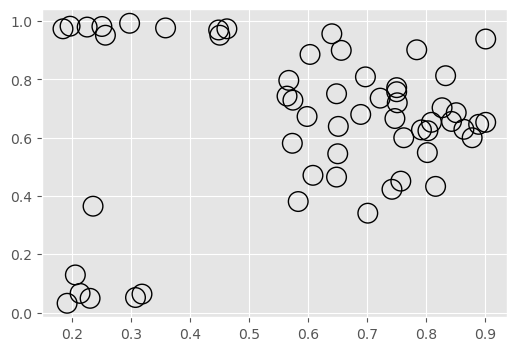

In [54]:
fig, ax = plt.subplots(figsize=(6,4))

# Vectores soporte
ax.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

In [34]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [35]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 87.17948717948718%
